In [1]:
#IMPORTS
import numpy as np
import cv2
import sklearn
import scipy
import imageio
import math
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [2]:
def get_phase_correlations(images):
    offsets = []
    for i in range(len(images)-1):
        d = cv2.phaseCorrelate(images[i], images[i+1])
        offsets.append(d)
    return offsets

In [62]:
def combine_images(image1, image2, offset_x, offset_y):
    offset_x = -int(offset_x)
    offset_y = int(offset_y)
    if offset_x < 0:
        merge_width = max(image2.shape[1], image1.shape[1]-offset_x)
        warp_offset_x = 0
        ref_offset_x = offset_x
    else:
        merge_width = max(image2.shape[1] + offset_x, image1.shape[1])
        warp_offset_x = offset_x
        ref_offset_x = 0
    if offset_y < 0:
        merge_height = max(image2.shape[0], image1.shape[0]-offset_y)
        warp_offset_y = 0
        ref_offset_y = offset_y
    else:
        merge_height = max(image2.shape[0] + offset_y, image1.shape[0])
        warp_offset_y = offset_y
        ref_offset_y = 0
    
    combined_image = np.zeros((merge_height,merge_width,3)).astype(np.uint8)
    for y in range(image1.shape[0]):
        for x in range(image1.shape[1]):
            if np.all((combined_image[y-ref_offset_y,x-ref_offset_x] == 0)):
                combined_image[y-ref_offset_y, x-ref_offset_x] = image1[y,x]
                
    for y in range(image2.shape[0]):
        for x in range(image2.shape[1]):
            if np.all((combined_image[y+warp_offset_y,x+warp_offset_x] == 0)):
                combined_image[y+warp_offset_y,x+warp_offset_x] = image2[y,x]
    
    
    return combined_image
    
    

In [63]:
images = [imageio.imread("test_images/"+str(x+1)+".jpg") for x in range(12)]
grayscale_images = []
for i in range(len(images)):
    grayscale_images.append(rgb2gray(images[i]))
offsets = get_phase_correlations(grayscale_images)


In [70]:
combined_image = images[0]
offset_x = 0
offset_y = 0
for i in range(len(images)-1):
    offset_x += offsets[i][0][0]
    offset_y += offsets[i][0][1] 
    combined_image = combine_images(combined_image, images[i+1], offset_x, offset_y)

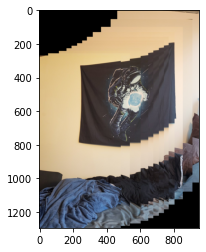

In [69]:
fig,axes = plt.subplots(1,1)
axes.imshow(combined_image)
plt.show()

In [60]:
ox = 0
oy = 0
for i in offsets:
    ox+= i[0][0]
    oy+= i[0][1]
    print(ox, oy, i[0][0], i[0][1])

-54.894214533702325 13.909855742164382 -54.894214533702325 13.909855742164382
-118.68720729190812 14.04808966343262 -63.7929927582058 0.1382339212682382
-163.90700887471633 16.371104056480192 -45.2198015828082 2.323014393047572
-193.47815495772295 15.958453628223936 -29.571146083006624 -0.4126504282562564
-226.3779476844661 15.850379234626018 -32.89979272674316 -0.10807439359791715
-256.40691975166527 16.85755810106997 -30.028972067199163 1.007178866443951
-284.1076468171284 22.15111368698564 -27.700727065463127 5.293555585915669
-319.55015632645734 28.685953334579153 -35.44250950932894 6.534839647593515
-368.21176199544493 31.063736057076028 -48.66160566898759 2.3777827224968746
-425.8430773389598 46.7927602580225 -57.63131534351487 15.72902420094647
-464.33490896019026 54.9779703753822 -38.49183162123046 8.185210117359702
